In [78]:
import os
from scipy import ndimage, misc
from matplotlib import pyplot as plt
import numpy as np
from sklearn.datasets import load_boston, load_diabetes, load_digits, load_breast_cancer
from keras.datasets import mnist
import pandas as pd
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [79]:
class LinearReg(object):
    @staticmethod 
    def fit(xtrain, ytrain):
        """
        Args:
            xtrain: NxD numpy array, where N is number 
                    of instances and D is the dimensionality of each 
                    instance
            ytarin: Nx1 numpy array, the true labels
        Return:
            weight: Dx1 numpy array, the weights of linear regression model
        """
        x_tp = np.transpose(xtrain)
        weight = np.linalg.inv(x_tp @ xtrain) @ x_tp @ ytrain
        return weight
        raise NotImplementedError

    @staticmethod
    def predict(xtest, weight):
        """
        Args:
            xtest: NxD numpy array, where N is number 
                   of instances and D is the dimensionality of each 
                   instance
            weight: Dx1 numpy array, the weights of linear regression model
        Return:
            prediction: Nx1 numpy array, the predicted labels
        """
        prediction = xtest @ weight
        return prediction
        raise NotImplementedError

In [80]:
class RidgeReg(LinearReg):

    @staticmethod
    def fit(xtrain, ytrain, c_lambda):
        xtrain = np.append(np.ones((xtrain.shape[0], 1)), xtrain, axis = 1)
        tau = c_lambda * np.eye(xtrain.shape[1])
        tau[0][0] = 0
        weight = np.linalg.inv(xtrain.T @ xtrain + tau) @ xtrain.T @ ytrain
        return weight
        raise NotImplementedError
        
    def predict(xtest, weight):
        x_phi = np.append(np.ones((xtest.shape[0],1)), xtest, axis = 1)
        prediction = x_phi @ weight
        return prediction
        raise NotImplementedError
#        

C:\Users\vn167\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


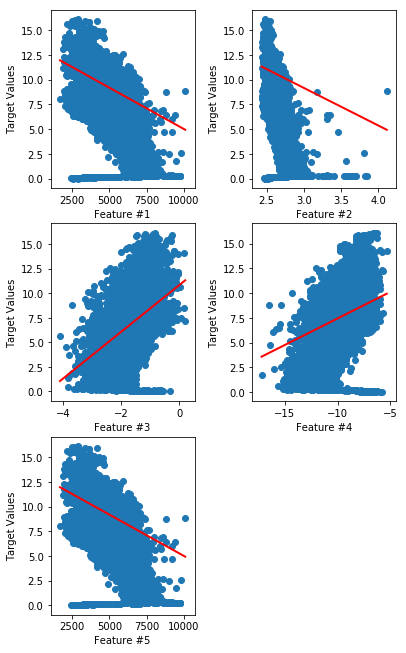

In [81]:
train = pd.read_csv("extract_train_full.csv", delimiter = ',')
dataset = train.as_matrix()
features = dataset[0:dataset.shape[0], 1:6]
target = dataset[0:dataset.shape[0], 6]
weight = LinearReg.fit(features, target)
predict = LinearReg.predict(features, weight)

fig, axes = plt.subplots(nrows=2, ncols=3)
fig.tight_layout()
fig.subplots_adjust(left=0.1, bottom=-1.2, right=0.9, top=0.9, wspace=0.4, hspace=0.2)

plt.subplot(321)
plt.ylabel("Target Values")
plt.xlabel("Feature #1")
feature_one = dataset[0:dataset.shape[0], 1].reshape(dataset.shape[0], 1)
x = np.array([np.amin(feature_one),np.amax(feature_one)])
y = np.array([predict[np.argmin(feature_one)], predict[np.argmax(feature_one)]])
plt.plot(x, y, color = 'r', linewidth = 2.0)
plt.scatter(feature_one, target)

plt.subplot(322)
plt.ylabel("Target Values")
plt.xlabel("Feature #2")
feature_two = dataset[0:dataset.shape[0], 2].reshape(dataset.shape[0], 1)
x = np.array([np.amin(feature_two),np.amax(feature_two)])
y = np.array([predict[np.argmin(feature_two)], predict[np.argmax(feature_two)]])
plt.plot(x, y, color = 'r', linewidth = 2.0)
plt.scatter(feature_two, target)

plt.subplot(323)
plt.ylabel("Target Values")
plt.xlabel("Feature #3")
feature_three = dataset[0:dataset.shape[0], 3].reshape(dataset.shape[0], 1)
x = np.array([np.amin(feature_three),np.amax(feature_three)])
y = np.array([predict[np.argmin(feature_three)], predict[np.argmax(feature_three)]])
plt.plot(x, y, color = 'r', linewidth = 2.0)
plt.scatter(feature_three, target)

plt.subplot(324)
plt.ylabel("Target Values")
plt.xlabel("Feature #4")
feature_four = dataset[0:dataset.shape[0], 4].reshape(dataset.shape[0], 1)
x = np.array([np.amin(feature_four),np.amax(feature_four)])
y = np.array([predict[np.argmin(feature_four)], predict[np.argmax(feature_four)]])
plt.plot(x, y, color = 'r', linewidth = 2.0)
plt.scatter(feature_four, target)

plt.subplot(325)
plt.ylabel("Target Values")
plt.xlabel("Feature #5")
feature_five = dataset[0:dataset.shape[0], 1].reshape(dataset.shape[0], 1)
x = np.array([np.amin(feature_five),np.amax(feature_five)])
y = np.array([predict[np.argmin(feature_five)], predict[np.argmax(feature_five)]])
plt.plot(x, y, color = 'r', linewidth = 2.0)
plt.scatter(feature_five, target)